In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_root = 'pre_generated_data'

In [3]:
prediction_horizon_data_folder = 'prediction_horizon_exp'
task_publication_interval_experiment_data_folder = os.path.join(data_root, prediction_horizon_data_folder)

In [4]:
# initialize dictionary to store constellation task publication interval utility data
constellation_task_publication_interval_utility_data = {}
# from bandwidth experiment, get constellation folder
constellation_folder_name_list = os.listdir(task_publication_interval_experiment_data_folder)
for constellation_folder_name in constellation_folder_name_list:
    constellation_folder_path = os.path.join(task_publication_interval_experiment_data_folder, constellation_folder_name)
    # get bandwidth folder
    task_publication_interval_folder_name_list = os.listdir(constellation_folder_path)
    for task_publication_interval_folder_name in task_publication_interval_folder_name_list:
        task_publication_interval_folder_path = os.path.join(constellation_folder_path, task_publication_interval_folder_name)
        task_publication_interval = int(re.findall(r'_(\d+)', task_publication_interval_folder_name)[0])
        # get random seed folder
        random_seed_folder_name_list = os.listdir(task_publication_interval_folder_path)
        for random_seed_folder_name in random_seed_folder_name_list:
            random_seed = int(re.findall(r'_(\d+)', random_seed_folder_name)[0])
            random_seed_folder_path = os.path.join(task_publication_interval_folder_path, random_seed_folder_name)
            # get utility file
            utility_file_path = os.path.join(random_seed_folder_path, 'records', f'utility_MPCAllocator_{random_seed}.json')
            # read utility file
            with open(utility_file_path, 'r') as utility_file:
                utility_data = json.load(utility_file)
            # get utility data
            total_utility = utility_data['total_utility']
            # store data
            if constellation_folder_name not in constellation_task_publication_interval_utility_data:
                constellation_task_publication_interval_utility_data[constellation_folder_name] = {}
            if task_publication_interval not in constellation_task_publication_interval_utility_data[constellation_folder_name]:
                constellation_task_publication_interval_utility_data[constellation_folder_name][task_publication_interval] = []
            constellation_task_publication_interval_utility_data[constellation_folder_name][task_publication_interval].append(total_utility)

print(constellation_task_publication_interval_utility_data)

{'starlink_top10_gs': {25: [2517.569792904117, 2658.821958575335, 2662.8915645161906], 40: [2549.6067021153954, 2531.136224792538, 2576.6304447022017], 15: [2430.222757332329, 2340.226829343165, 2476.5105195083142], 30: [2603.3569371465424, 2429.0006088611685, 2534.555184543452], 20: [2480.872347116278, 2265.6417751266795, 2486.999542767621], 10: [2238.9128796513533, 2443.1542491328732, 2435.5239081934315], 35: [2540.397944437398, 2595.1559219865817, 2415.966727849577]}, 'sentinel2_sentinel_gs': {13: [1006.1598312785139, 1108.5678838773579, 1029.6158865798852], 5: [823.2297321219584, 628.6985598301433, 754.0499664638006], 1: [0.0, 0.0, 0.0], 11: [1069.754525296922, 1015.7598465314609, 1232.3584447901967], 7: [975.3525705846403, 1093.9630249410523, 944.4030494020973], 9: [1276.390900912868, 972.6556264342909, 995.6643519809966], 3: [876.9770492609515, 900.7053315211166, 868.8633612750796]}}


In [5]:
fig_root_folder = 'figs'
bandwidth_utility_fig_folder = 'prediction_horizon_utility'
fig_folder = os.path.join(fig_root_folder, bandwidth_utility_fig_folder)
os.makedirs(fig_folder, exist_ok=True)

In [6]:
plt_config = {
    'sentinel2_sentinel_gs': {'label': 'Sentinel-2', 'color': '#1240AB', 'marker': 'o', 'linestyle': '-'},
    'starlink_top10_gs': {'label': 'Starlink', 'color': '#7109AA', 'marker': 's', 'linestyle': '--'},
}

In [7]:
font_size = 28
line_width = 3
marker_size = 10

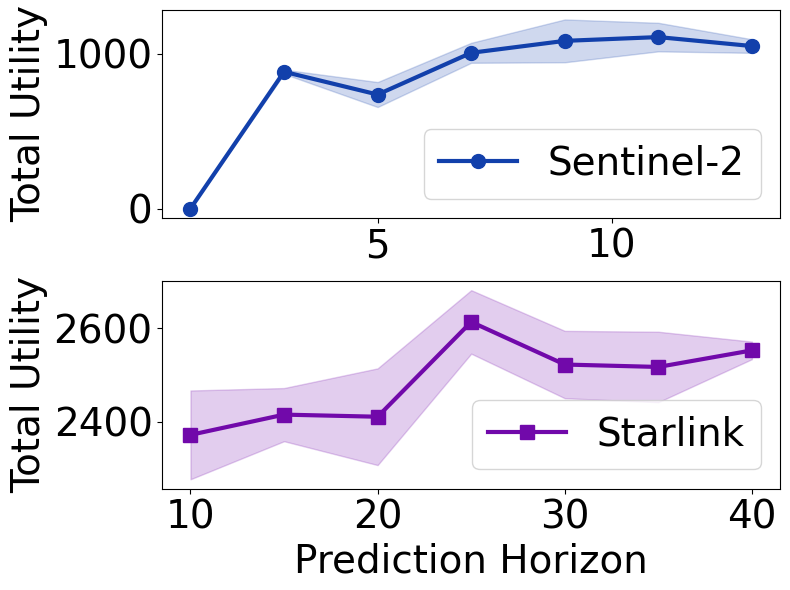

In [8]:
# plot a figure with two subplots, one for sentinel and the other for starlink
# the total figure size of two subplots is (8, 6)
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# plot the subplot for sentinel
ax = axs[0]
for constellation_name, task_publication_interval_utility_data in constellation_task_publication_interval_utility_data.items():
    if constellation_name != 'sentinel2_sentinel_gs':
        continue
    task_publication_interval_list = []
    utility_mean_list = []
    utility_std_list = []
    # sort task publication interval data by task publication interval
    task_publication_utility_data = dict(sorted(task_publication_interval_utility_data.items()))
    for task_publication_interval, utility_list in task_publication_utility_data.items():
        task_publication_interval_list.append(task_publication_interval)
        utility_mean_list.append(np.mean(utility_list))
        utility_std_list.append(np.std(utility_list))

    task_publication_interval_list, utility_mean_list, utility_std_list = zip(*sorted(zip(task_publication_interval_list, utility_mean_list, utility_std_list)))
    task_publication_interval_list = list(task_publication_interval_list)
    utility_mean_list = list(utility_mean_list)
    utility_std_list = list(utility_std_list)

    marker = plt_config[constellation_name]['marker']
    color = plt_config[constellation_name]['color']
    label = plt_config[constellation_name]['label']
    # plot with line as the utility lise and std as the error shadow area
    ax.plot(task_publication_interval_list, utility_mean_list, label=label, color=color, marker=marker, markersize=marker_size, linewidth=line_width)
    ax.fill_between(task_publication_interval_list, np.array(utility_mean_list) - np.array(utility_std_list), np.array(utility_mean_list) + np.array(utility_std_list), color=color, alpha=0.2)
    ax.legend(fontsize=font_size)


# plot the subplot for starlink
ax = axs[1]
for constellation_name, task_publication_interval_utility_data in constellation_task_publication_interval_utility_data.items():
    if constellation_name != 'starlink_top10_gs':
        continue
    task_publication_interval_list = []
    utility_mean_list = []
    utility_std_list = []
    # sort task publication interval data by task publication interval
    task_publication_utility_data = dict(sorted(task_publication_interval_utility_data.items()))
    for task_publication_interval, utility_list in task_publication_utility_data.items():
        task_publication_interval_list.append(task_publication_interval)
        utility_mean_list.append(np.mean(utility_list))
        utility_std_list.append(np.std(utility_list))

    task_publication_interval_list, utility_mean_list, utility_std_list = zip(*sorted(zip(task_publication_interval_list, utility_mean_list, utility_std_list)))
    task_publication_interval_list = list(task_publication_interval_list)
    utility_mean_list = list(utility_mean_list)
    utility_std_list = list(utility_std_list)

    marker = plt_config[constellation_name]['marker']
    color = plt_config[constellation_name]['color']
    label = plt_config[constellation_name]['label']
    # plot with line as the utility lise and std as the error shadow area
    ax.plot(task_publication_interval_list, utility_mean_list, label=label, color=color, marker=marker, markersize=marker_size, linewidth=line_width)
    ax.fill_between(task_publication_interval_list, np.array(utility_mean_list) - np.array(utility_std_list), np.array(utility_mean_list) + np.array(utility_std_list), color=color, alpha=0.2)
    ax.legend(fontsize=font_size)

# set x and y labels
plt.xlabel('Prediction Horizon', fontsize=font_size)
axs[0].set_ylabel('Total Utility', fontsize=font_size)
axs[1].set_ylabel('Total Utility', fontsize=font_size)

# set x and y ticks
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].tick_params(axis='both', which='major', labelsize=font_size)

plt.tight_layout()
fig_name = f'fig6a_prediction_horizon_utility_subplots.pdf'
fig_path = os.path.join(fig_folder, fig_name)
plt.savefig(fig_path)
plt.savefig(fig_path.replace('.pdf', '.png'))
